Exploração e limpeza de dados

In [139]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")


Carregar dataset

In [140]:
caminho = "../data/tweets.csv"

if not os.path.exists(caminho):
    raise FileNotFoundError(f"Arquivo não encontrado: {caminho}")

df = pd.read_csv(caminho)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
display(df.head())



,text,label
0,Adorei o produto de investimentos no mercado d...,positivo
1,O serviço de instalação internet doi péssimo. ...,negativo
2,Entrega rápida com atendimento excelente,positivo
3,Não voltarei a comprar,negativo
4,"Adorei o produto, superou minhas expectativas!",positivo


Analise exploratoria

In [141]:
print(df.info())
print(df.isnull().sum())

if "label" not in df.columns or "text" not in df.columns:
    raise ValueError("Colunas label e text devem ser preenchidas no dataset")




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16 non-null     object
 1   label   16 non-null     object
dtypes: object(2)
memory usage: 388.0+ bytes
None
text     0
label    0
dtype: int64


label
positivo    9
negativo    7
Name: count, dtype: int64
          text_length
label                
negativo    36.000000
positivo    35.666667


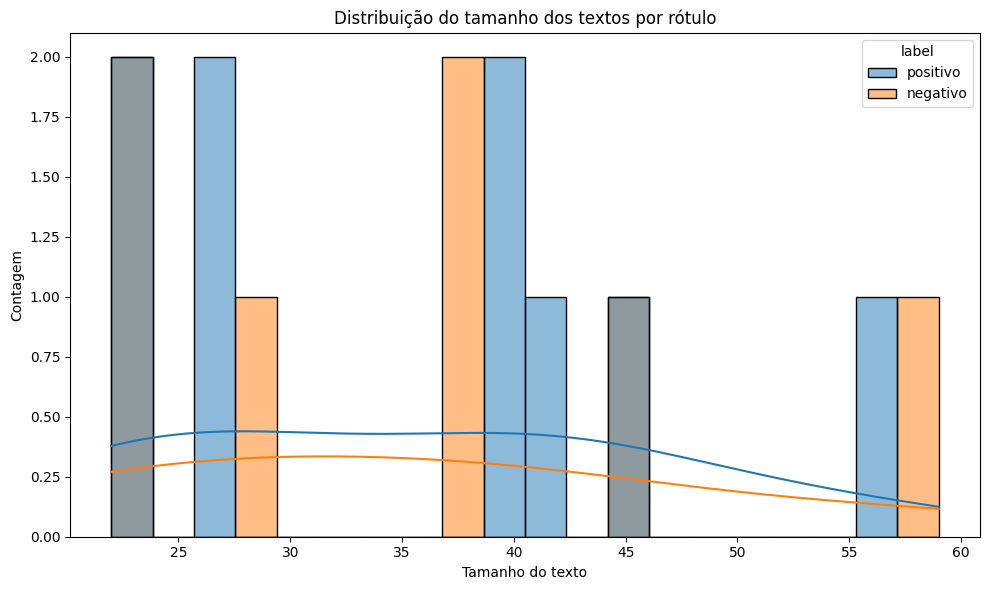

In [142]:
print(df["label"].value_counts())
df["text_length"] = df["text"].astype(str).apply(len)
print(df[["label","text_length"]].groupby("label").mean())

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="text_length", hue="label", bins=20, kde=True)
plt.title("Distribuição do tamanho dos textos por rótulo")
plt.xlabel("Tamanho do texto")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()


Salvar dataset limpo

In [143]:
df.to_csv("../data/tweets_limpo.csv", index=False)
print("Arquivo salvo em ../data/tweets_limpo.csv")

Arquivo salvo em ../data/tweets_limpo.csv
